**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy import stats
%load_ext pycodestyle_magic

In [14]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.x_train = np.array(X).astype(float)
        self.y_train = np.array(y)
        self.y_label = np.unique(y)
        self.n_classes = np.shape(self.y_label)[0]
        self.y_dist = (self.x_train ** 2).sum(axis=1)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.x_train, leaf_size=60)

    def predict(self, X):
        if self.algorithm == 'brute':
            return self.predict_brute(X)
        elif self.algorithm == 'kd_tree':
            return self.predict_kdtree(X)
        
    def predict_proba(self, X):
        if self.algorithm == 'brute':
            return self.predict_proba_brute(X)
        elif self.algorithm == 'kd_tree':
            return self.predict_proba_kdtree(X)

    def predict_kdtree(self, X):
        X = X.astype(float)
        dist, ind = self.tree.query(X, k=self.neighbors)
        predict = self.y_train[ind].T
        return stats.mode(predict)[0].reshape(-1)

    def predict_brute(self, X):
        X = X.astype(float)
        x_dist = (X ** 2).sum(axis=1)
        xy_dist = X.dot(self.x_train.T)
        dist = -2*xy_dist + self.y_dist + x_dist.reshape(-1, 1)
        distance = np.sqrt(dist)
        predict = self.y_train[np.argsort(distance)[:, :self.neighbors]]
        return stats.mode(predict.T)[0].reshape(-1)
    
    def predict_proba_kdtree(self, X):
        X = X.astype(float)
        dist, k_pred = self.tree.query(X, k=self.neighbors)
        predict = np.zeros((np.shape(X)[0], np.shape(self.y_label)[0]))
        for i in range(np.shape(k_pred)[0]):
            for j in k_pred[i]:
                predict[i][int(self.y_train[j])] += 1
        return predict / self.neighbors

    def predict_proba_brute(self, X):
        X = X.astype(float)
        x_dist = (X ** 2).sum(axis=1)
        xy_dist = X.dot(self.x_train.T)
        dist = -2*xy_dist + self.y_dist + x_dist.reshape(-1, 1)
        distance = np.sqrt(dist)

        k_pred = np.argsort(distance)[:, :self.neighbors]
        predict = np.zeros((np.shape(X)[0], np.shape(self.y_label)[0]))
        for i in range(np.shape(k_pred)[0]):
            for j in k_pred[i]:
                predict[i][int(self.y_train[j])] += 1
        return predict / self.neighbors

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.array([1 for i, x in enumerate(y_pred)
                        if x == y[i]]).sum(axis=0) / len(y)

**IRIS**

In [4]:
iris = datasets.load_iris()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [38]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [39]:
%time clf.fit(X_train, y_train)

CPU times: user 2.06 ms, sys: 14 µs, total: 2.07 ms
Wall time: 1.62 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [40]:
%time my_clf.fit(X_train, y_train)

CPU times: user 349 µs, sys: 52 µs, total: 401 µs
Wall time: 336 µs


In [41]:
%time clf.predict(X_test)

CPU times: user 3.78 ms, sys: 974 µs, total: 4.76 ms
Wall time: 3.67 ms


array([2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2])

In [42]:
%time my_clf.predict(X_test)

CPU times: user 1.94 ms, sys: 977 µs, total: 2.92 ms
Wall time: 1.89 ms


array([2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2])

In [43]:
%time clf.predict_proba(X_test)

CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 1.59 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [44]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.57 ms, sys: 1.77 ms, total: 3.34 ms
Wall time: 2.03 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [45]:
clf.score(X_test, y_test)

0.9333333333333333

In [46]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

/home/Albert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


Best number of neigbors is 19


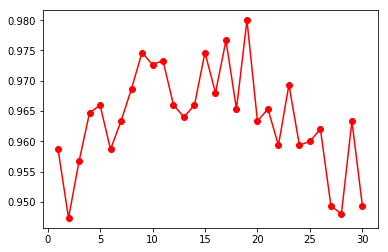

In [49]:
#%%pycodestyle
n_neighbors = 30
num_of_tests = 100
scores = []

for i in range(1, n_neighbors+1):
    testing_scores = []
    for j in range(num_of_tests):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target,
            test_size=0.1, stratify=iris.target
        )
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        testing_scores.append(my_clf.score(X_test, y_test))
    scores.append(np.mean(testing_scores))

best_n = np.argmax(scores) + 1
print("Best number of neigbors is {}".format(best_n))

plt.plot(list(range(1, n_neighbors+1)), scores, 'ro-')
plt.show()

**MNIST**

In [4]:
mnist = fetch_mldata('MNIST original')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [52]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [53]:
%time clf.fit(X_train, y_train)

CPU times: user 3min 9s, sys: 712 ms, total: 3min 9s
Wall time: 3min 12s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [54]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.4 s, sys: 825 ms, total: 2.23 s
Wall time: 920 ms


In [55]:
%time clf.predict(X_test)

CPU times: user 4min 22s, sys: 5.85 ms, total: 4min 22s
Wall time: 4min 27s


array([2., 7., 9., 4., 5., 9., 0., 7., 3., 4., 5., 1., 6., 7., 4., 4., 4.,
       3., 7., 0., 1., 1., 8., 8., 7., 5., 6., 1., 2., 4., 5., 3., 2., 9.,
       6., 9., 1., 3., 5., 7., 9., 2., 9., 4., 5., 1., 1., 7., 4., 7., 0.,
       4., 4., 1., 5., 1., 1., 0., 6., 6., 3., 6., 0., 7., 4., 8., 1., 0.,
       9., 4., 2., 5., 1., 7., 3., 7., 2., 3., 7., 9., 8., 7., 8., 1., 6.,
       1., 6., 2., 2., 2., 5., 2., 2., 5., 0., 4., 8., 0., 9., 7., 0., 2.,
       1., 5., 8., 6., 0., 1., 2., 6., 3., 5., 3., 0., 8., 4., 4., 5., 1.,
       1., 0., 0., 3., 3., 1., 3., 4., 7., 0., 0., 4., 8., 5., 0., 3., 5.,
       7., 8., 7., 5., 2., 4., 8., 5., 4., 3., 3., 0., 9., 6., 4., 2., 0.,
       6., 9., 1., 4., 8., 0., 1., 4., 0., 1., 5., 6., 2., 8., 6., 4., 7.,
       1., 6., 3., 5., 1., 3., 9., 6., 0., 1., 1., 0., 1., 5., 9., 8., 5.,
       6., 2., 9., 2., 8., 3., 7., 4., 2., 2., 3., 8., 2., 2., 3., 5., 6.,
       5., 5., 4., 4., 4., 9., 8., 4., 2., 1., 7., 9., 3., 5., 2., 8., 9.,
       8., 0., 6., 0., 4.

In [56]:
%time my_clf.predict(X_test)

CPU times: user 46.5 s, sys: 2.2 s, total: 48.7 s
Wall time: 21.2 s


array([2., 7., 9., 4., 5., 9., 0., 7., 3., 4., 5., 1., 6., 7., 4., 4., 4.,
       3., 7., 0., 1., 1., 8., 8., 7., 5., 6., 1., 2., 4., 5., 3., 2., 9.,
       6., 9., 1., 3., 5., 7., 9., 2., 9., 4., 5., 1., 1., 7., 4., 7., 0.,
       4., 4., 1., 5., 1., 1., 0., 6., 6., 3., 6., 0., 7., 4., 8., 1., 0.,
       9., 4., 2., 5., 1., 7., 3., 7., 2., 3., 7., 9., 8., 7., 8., 1., 6.,
       1., 6., 2., 2., 2., 5., 2., 2., 5., 0., 4., 8., 0., 9., 7., 0., 2.,
       1., 5., 8., 6., 0., 1., 2., 6., 3., 5., 3., 0., 8., 4., 4., 5., 1.,
       1., 0., 0., 3., 3., 1., 3., 4., 7., 0., 0., 4., 8., 5., 0., 3., 5.,
       7., 8., 7., 5., 2., 4., 8., 5., 4., 3., 3., 0., 9., 6., 4., 2., 0.,
       6., 9., 1., 4., 8., 0., 1., 4., 0., 1., 5., 6., 2., 8., 6., 4., 7.,
       1., 6., 3., 5., 1., 3., 9., 6., 0., 1., 1., 0., 1., 5., 9., 8., 5.,
       6., 2., 9., 2., 8., 3., 7., 4., 2., 2., 3., 8., 2., 2., 3., 5., 6.,
       5., 5., 4., 4., 4., 9., 8., 4., 2., 1., 7., 9., 3., 5., 2., 8., 9.,
       8., 0., 6., 0., 4.

In [57]:
%time clf.predict_proba(X_test)

CPU times: user 4min 21s, sys: 27 ms, total: 4min 21s
Wall time: 4min 25s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [58]:
%time my_clf.predict_proba(X_test)

CPU times: user 46.4 s, sys: 2.14 s, total: 48.5 s
Wall time: 20.7 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [59]:
clf.score(X_test, y_test)

0.9685714285714285

In [60]:
my_clf.score(X_test, y_test)

0.9685714285714285

Задание 4

In [15]:
clf = KNeighborsClassifier(n_neighbors=19, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=19, algorithm='kd_tree')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 2min 55s, sys: 679 ms, total: 2min 56s
Wall time: 2min 57s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2min 56s, sys: 1.32 s, total: 2min 58s
Wall time: 2min 58s


In [9]:
%time clf.predict(X_test)

CPU times: user 3min 50s, sys: 38.9 ms, total: 3min 50s
Wall time: 3min 54s


array([1., 6., 9., 9., 4., 8., 3., 3., 1., 0., 7., 2., 5., 0., 4., 1., 4.,
       1., 8., 3., 1., 4., 2., 1., 8., 1., 5., 7., 8., 5., 5., 3., 7., 6.,
       2., 1., 0., 3., 3., 5., 0., 1., 0., 1., 4., 7., 2., 6., 5., 0., 9.,
       7., 6., 7., 2., 2., 6., 8., 1., 6., 5., 5., 5., 2., 0., 0., 0., 9.,
       3., 4., 5., 9., 9., 4., 0., 3., 3., 4., 8., 1., 8., 6., 9., 1., 3.,
       4., 8., 5., 3., 7., 3., 1., 6., 3., 9., 6., 5., 9., 9., 0., 9., 2.,
       7., 6., 2., 3., 6., 7., 3., 0., 3., 7., 0., 4., 4., 9., 1., 3., 4.,
       3., 9., 6., 2., 4., 1., 5., 2., 6., 9., 7., 3., 9., 7., 4., 1., 5.,
       4., 2., 1., 7., 1., 2., 3., 9., 7., 1., 7., 9., 8., 6., 5., 4., 1.,
       6., 4., 6., 4., 6., 6., 9., 6., 7., 2., 8., 1., 1., 5., 3., 6., 9.,
       8., 9., 4., 2., 4., 8., 5., 3., 2., 4., 6., 9., 8., 9., 8., 7., 7.,
       1., 7., 4., 7., 7., 0., 4., 0., 9., 4., 4., 7., 0., 4., 5., 5., 6.,
       0., 3., 4., 5., 0., 3., 6., 3., 4., 8., 3., 6., 8., 5., 2., 3., 5.,
       7., 5., 6., 2., 4.

In [7]:
%time my_clf.predict(X_test)

CPU times: user 3min 14s, sys: 29.1 ms, total: 3min 14s
Wall time: 3min 17s


array([1., 6., 9., 9., 4., 8., 3., 3., 1., 0., 7., 2., 5., 0., 4., 1., 4.,
       1., 8., 3., 1., 4., 2., 1., 8., 1., 5., 7., 8., 5., 5., 3., 7., 6.,
       2., 1., 0., 3., 3., 5., 0., 1., 0., 1., 4., 7., 2., 6., 5., 0., 9.,
       7., 6., 7., 2., 2., 6., 8., 1., 6., 5., 5., 5., 2., 0., 0., 0., 9.,
       3., 4., 5., 9., 9., 4., 0., 3., 3., 4., 8., 1., 8., 6., 9., 1., 3.,
       4., 8., 5., 3., 7., 3., 1., 6., 3., 9., 6., 5., 9., 9., 0., 9., 2.,
       7., 6., 2., 3., 6., 7., 3., 0., 3., 7., 0., 4., 4., 9., 1., 3., 4.,
       3., 9., 6., 2., 4., 1., 5., 2., 6., 9., 7., 3., 9., 7., 4., 1., 5.,
       4., 2., 1., 7., 1., 2., 3., 9., 7., 1., 7., 9., 8., 6., 5., 4., 1.,
       6., 4., 6., 4., 6., 6., 9., 6., 7., 2., 8., 1., 1., 5., 3., 6., 9.,
       8., 9., 4., 2., 4., 8., 5., 3., 2., 4., 6., 9., 8., 9., 8., 7., 7.,
       1., 7., 4., 7., 7., 0., 4., 0., 9., 4., 4., 7., 0., 4., 5., 5., 6.,
       0., 3., 4., 5., 0., 3., 6., 3., 4., 8., 3., 6., 8., 5., 2., 3., 5.,
       7., 5., 6., 2., 4.

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 3min 51s, sys: 60.6 ms, total: 3min 51s
Wall time: 3min 54s


array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10526316, 0.        ,
        0.89473684],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
%time my_clf.predict_proba(X_test)

CPU times: user 3min 16s, sys: 23.3 ms, total: 3min 16s
Wall time: 3min 19s


array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10526316, 0.        ,
        0.89473684],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
clf.score(X_test, y_test)

0.9628571428571429

In [13]:
my_clf.score(X_test, y_test)

0.9628571428571429

Задание 5

In [ ]:
# seaborn  -  библиотека, отснованная на matplotlib для визуализации данных в т.ч. многомерных
# matplotlib  -  библиотека для построения графиков 
# train_test_split  -  разбитие данных на две части: тренировочную и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)  -  нужен для послежовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler)  -  преобразование данных таким образом, что
#                                       распределение будет иметь среднее значение 0 и стандартное отклонение 1
# ClassifierMixin  -  самый базовый класс для всех классификаторов sklearn
# NeighborsBase  -  базовый класс для knn
# KNeighborsMixin  -  базовый класс для knn, содаржащий поиск соседей
# SupervisedIntegerMixin  -  базовый класс, содержащий метод fit